In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.tree import DecisionTreeClassifier

In [2]:
training_data = pd.read_csv("train70_reduced.csv")
testing_data = pd.read_csv("test30_reduced.csv")

In [5]:
training = pd.DataFrame(training_data)
testing = pd.DataFrame(testing_data)

In [6]:
# divisão em duas classes

for index, row in training.iterrows():
    if row['target'] == 'dos':
        training.at[index, 'target'] = '1'
    else:
        training.at[index, 'target'] = '0'

for index, row in testing.iterrows():
    if row['target'] == 'dos':
        testing.at[index, 'target'] = '1'
    else:
        testing.at[index, 'target'] = '0'
        
print("Training target: {}".format(training['target'].unique()))
print("Testing target: {}".format(testing['target'].unique()))

Training target: ['0' '1']
Testing target: ['0' '1']


In [7]:
# para a feature TCP Flags

# training
for number, row in training.iterrows():                     # number represents de index of the column
    if row['tcp.flags'] == "0x00000010":                # row represents the data of the row
        training.at[number, 'tcp.flags'] = "ACK"            # the method at. update the row to the new value
    elif row['tcp.flags'] == "0x00000002":
        training.at[number, 'tcp.flags'] = "SYN"
    elif row['tcp.flags'] == "0x00000012":
        training.at[number, 'tcp.flags'] = "SYN ACK"
    elif row['tcp.flags'] == "0x00000011":
        training.at[number, 'tcp.flags'] = "FIN ACK"
    elif row['tcp.flags'] == "0x00000004":
        training.at[number, 'tcp.flags'] = "RST"
    elif row['tcp.flags'] == "0x00000014":
        training.at[number, 'tcp.flags'] = "RST ACK"
    elif row['tcp.flags'] == "0x00000018":
        training.at[number, 'tcp.flags'] = "PSH ACK"
    elif row['tcp.flags'] == "0x00000019":
        training.at[number, 'tcp.flags'] = "ZERO"
        
# testing
for number, row in testing.iterrows():                     
    if row['tcp.flags'] == "0x00000010":                
        testing.at[number, 'tcp.flags'] = "ACK"            
    elif row['tcp.flags'] == "0x00000002":
        testing.at[number, 'tcp.flags'] = "SYN"
    elif row['tcp.flags'] == "0x00000012":
        testing.at[number, 'tcp.flags'] = "SYN ACK"
    elif row['tcp.flags'] == "0x00000011":
        testing.at[number, 'tcp.flags'] = "FIN ACK"
    elif row['tcp.flags'] == "0x00000004":
        testing.at[number, 'tcp.flags'] = "RST"
    elif row['tcp.flags'] == "0x00000014":
        testing.at[number, 'tcp.flags'] = "RST ACK"
    elif row['tcp.flags'] == "0x00000018":
        testing.at[number, 'tcp.flags'] = "PSH ACK"
    elif row['tcp.flags'] == "0x00000019":
        testing.at[number, 'tcp.flags'] = "ZERO"

In [8]:
# para a feature MQTT Flags

# training
for number, row in training.iterrows():                             # number represents de index of the column
    if row['mqtt.hdrflags'] == "0x00000030":                        # row represents the data of the row
        training.at[number, 'mqtt.hdrflags'] = "110000"             # the method at. update the row to the new value
    elif row['mqtt.hdrflags'] == "0x00000032":
        training.at[number, 'mqtt.hdrflags'] = "110010"
    elif row['mqtt.hdrflags'] == "0x00000040":
        training.at[number, 'mqtt.hdrflags'] = "1000000"
    elif row['mqtt.hdrflags'] == "0":
        training.at[number, 'mqtt.hdrflags'] = "0"
    elif row['mqtt.hdrflags'] == "0x00000020":
        training.at[number, 'mqtt.hdrflags'] = "100000"
    elif row['mqtt.hdrflags'] == "0x0000003a":
        training.at[number, 'mqtt.hdrflags'] = "111010"
    elif row['mqtt.hdrflags'] == "0x000000d0":
        training.at[number, 'mqtt.hdrflags'] = "11010000"
    elif row['mqtt.hdrflags'] == "0x000000c0":
        training.at[number, 'mqtt.hdrflags'] = "11000000"
    elif row['mqtt.hdrflags'] == "0x00000010":
        training.at[number, 'mqtt.hdrflags'] = "10000"
    elif row['mqtt.hdrflags'] == "0x00000090":
        training.at[number, 'mqtt.hdrflags'] = "10010000"
    elif row['mqtt.hdrflags'] == "0x00000031":
        training.at[number, 'mqtt.hdrflags'] = "110001"
    elif row['mqtt.hdrflags'] == "0x00000050":
        training.at[number, 'mqtt.hdrflags'] = "1010000"
    elif row['mqtt.hdrflags'] == "0x00000082":
        training.at[number, 'mqtt.hdrflags'] = "10000010"
    elif row['mqtt.hdrflags'] == "0x000000e0":
        training.at[number, 'mqtt.hdrflags'] = "11100000"
        
# testing
for number, row in testing.iterrows():                             # number represents de index of the column
    if row['mqtt.hdrflags'] == "0x00000030":                       # row represents the data of the row
        testing.at[number, 'mqtt.hdrflags'] = "110000"             # the method at. update the row to the new value
    elif row['mqtt.hdrflags'] == "0x00000032":
        testing.at[number, 'mqtt.hdrflags'] = "110010"
    elif row['mqtt.hdrflags'] == "0x00000040":
        testing.at[number, 'mqtt.hdrflags'] = "1000000"
    elif row['mqtt.hdrflags'] == "0":
        testing.at[number, 'mqtt.hdrflags'] = "0"
    elif row['mqtt.hdrflags'] == "0x00000020":
        testing.at[number, 'mqtt.hdrflags'] = "100000"
    elif row['mqtt.hdrflags'] == "0x0000003a":
        testing.at[number, 'mqtt.hdrflags'] = "111010"
    elif row['mqtt.hdrflags'] == "0x000000d0":
        testing.at[number, 'mqtt.hdrflags'] = "11010000"
    elif row['mqtt.hdrflags'] == "0x000000c0":
        testing.at[number, 'mqtt.hdrflags'] = "11000000"
    elif row['mqtt.hdrflags'] == "0x00000010":
        testing.at[number, 'mqtt.hdrflags'] = "10000"
    elif row['mqtt.hdrflags'] == "0x00000090":
        testing.at[number, 'mqtt.hdrflags'] = "10010000"
    elif row['mqtt.hdrflags'] == "0x00000031":
        testing.at[number, 'mqtt.hdrflags'] = "110001"
    elif row['mqtt.hdrflags'] == "0x00000050":
        testing.at[number, 'mqtt.hdrflags'] = "1010000"
    elif row['mqtt.hdrflags'] == "0x00000082":
        testing.at[number, 'mqtt.hdrflags'] = "10000010"
    elif row['mqtt.hdrflags'] == "0x000000e0":
        testing.at[number, 'mqtt.hdrflags'] = "11100000"

In [9]:
# remoção de features com valores 0

training = training.drop(columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 
             'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
             'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg'])

testing = testing.drop(columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 
             'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
             'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg'])

print(training.shape)
print(testing.shape)

(231646, 20)
(99290, 20)


In [13]:
print("Training: {}".format(training['mqtt.hdrflags'].unique()))
print("Testing: {}".format(testing['mqtt.hdrflags'].unique()))

Training: ['110000' '110010' '1000000' '0' '100000' '111010' '11010000' '11000000'
 '10000' '10010000' '110001' '1010000' '10000010' '11100000']
Testing: ['0' '111010' '110000' '110010' '1000000' '10000' '100000' '11000000'
 '10000010' '11010000' '10010000' '11100000' '110001' '1010000']


In [14]:
print("Training: {}".format(training['tcp.flags'].unique()))
print("Testing: {}".format(testing['tcp.flags'].unique()))

Training: ['PSH ACK' 'ACK' 'RST' 'SYN ACK' 'SYN' 'FIN ACK' 'ZERO' 'RST ACK']
Testing: ['RST ACK' 'PSH ACK' 'SYN ACK' 'ACK' 'ZERO' 'SYN' 'RST' 'FIN ACK']


In [15]:
# ajuste das variaveis categoricas

features_training = pd.get_dummies(training.iloc[:,:-1])
target_training = training['target']

features_testing = pd.get_dummies(testing.iloc[:,:-1])
target_testing = testing['target']

In [19]:
print(features_training.shape)
print(features_testing.shape)
print(target_training.shape)
print(target_testing.shape)

(231646, 44)
(99290, 43)
(231646,)
(99290,)


In [21]:
print("Training keys: {}".format(features_training.keys()))

Training keys: Index(['tcp.time_delta', 'tcp.len', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.ver', 'tcp.flags_ACK',
       'tcp.flags_FIN ACK', 'tcp.flags_PSH ACK', 'tcp.flags_RST',
       'tcp.flags_RST ACK', 'tcp.flags_SYN', 'tcp.flags_SYN ACK',
       'tcp.flags_ZERO', 'mqtt.conack.flags_0', 'mqtt.conack.flags_0x00000000',
       'mqtt.conflags_0', 'mqtt.conflags_0x00000002',
       'mqtt.conflags_0x00000082', 'mqtt.conflags_0x000000c2',
       'mqtt.hdrflags_0', 'mqtt.hdrflags_10000', 'mqtt.hdrflags_100000',
       'mqtt.hdrflags_1000000', 'mqtt.hdrflags_10000010',
       'mqtt.hdrflags_10010000', 'mqtt.hdrflags_1010000',
       'mqtt.hdrflags_110000', 'mqtt.hdrflags_11000000',
       'mqtt.hdrflags_110001', 'mqtt.hdrflags_110010',
       'mqtt.hdrflags_11010000', 'mqtt.hdrflags_11100000',
       'mqtt.hdrf

In [22]:
print("Testing keys: {}".format(features_testing.keys()))

Testing keys: Index(['tcp.time_delta', 'tcp.len', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.ver', 'tcp.flags_ACK',
       'tcp.flags_FIN ACK', 'tcp.flags_PSH ACK', 'tcp.flags_RST',
       'tcp.flags_RST ACK', 'tcp.flags_SYN', 'tcp.flags_SYN ACK',
       'tcp.flags_ZERO', 'mqtt.conack.flags_0', 'mqtt.conack.flags_0x00000000',
       'mqtt.conflags_0', 'mqtt.conflags_0x00000002',
       'mqtt.conflags_0x000000c2', 'mqtt.hdrflags_0', 'mqtt.hdrflags_10000',
       'mqtt.hdrflags_100000', 'mqtt.hdrflags_1000000',
       'mqtt.hdrflags_10000010', 'mqtt.hdrflags_10010000',
       'mqtt.hdrflags_1010000', 'mqtt.hdrflags_110000',
       'mqtt.hdrflags_11000000', 'mqtt.hdrflags_110001',
       'mqtt.hdrflags_110010', 'mqtt.hdrflags_11010000',
       'mqtt.hdrflags_11100000', 'mqtt.hdrflags_111010', 'mqtt.protoname_0',
  

In [20]:
set_features_training = set(features_training)
set_features_testing = set(features_testing)

features_only_in_training = set_features_training - set_features_testing

features_only_in_testing = set_features_testing - set_features_training

print("Características presentes apenas nos dados de treinamento:")
print(features_only_in_training)

print("Características presentes apenas nos dados de teste:")
print(features_only_in_testing)

Características presentes apenas nos dados de treinamento:
{'mqtt.conflags_0x00000082'}
Características presentes apenas nos dados de teste:
set()


In [23]:
features_training = features_training.drop(columns = ['mqtt.conflags_0', 'mqtt.conflags_0x00000002', 'mqtt.conflags_0x00000082', 'mqtt.conflags_0x000000c2'])

features_testing = features_testing.drop(columns = ['mqtt.conflags_0', 'mqtt.conflags_0x00000002','mqtt.conflags_0x000000c2'])

In [24]:
print(features_training.shape)
print(features_testing.shape)

(231646, 40)
(99290, 40)


In [28]:
col = ['tcp.flags_ACK', 'tcp.flags_FIN ACK', 'tcp.flags_PSH ACK', 'tcp.flags_RST', 'tcp.flags_RST ACK', 'tcp.flags_SYN', 'tcp.flags_SYN ACK', 'tcp.flags_ZERO', 'mqtt.conack.flags_0', 'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0', 'mqtt.hdrflags_10000', 'mqtt.hdrflags_100000', 'mqtt.hdrflags_1000000', 'mqtt.hdrflags_10000010', 'mqtt.hdrflags_10010000', 'mqtt.hdrflags_1010000', 'mqtt.hdrflags_110000', 'mqtt.hdrflags_11000000', 'mqtt.hdrflags_110001', 'mqtt.hdrflags_110010', 'mqtt.hdrflags_11010000', 'mqtt.hdrflags_111010', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [29]:
# substituição das colunas com valores FALSE e TRUE por 0 e 1, respectivamente

features_training[col] = features_training[col].replace({True: 1, False: 0})
features_testing[col] = features_testing[col].replace({True: 1, False: 0})

In [30]:
features_training = features_training.values
features_testing = features_testing.values
target_training = target_training.values
target_testing = target_testing.values

Decision Tree Classifier

In [31]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(features_training, target_training)

DecisionTreeClassifier(random_state=0)

In [32]:
print("Accuracy: {}".format(tree.score(features_training, target_training)))
print("Accuracy: {}".format(tree.score(features_testing, target_testing)))

Accuracy: 0.9536836379648257
Accuracy: 0.947235371135059


In [33]:
predict = tree.predict(features_testing)

In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(target_testing, predict)

In [35]:
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[58585  1628]
 [ 3611 35466]]


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (231646).

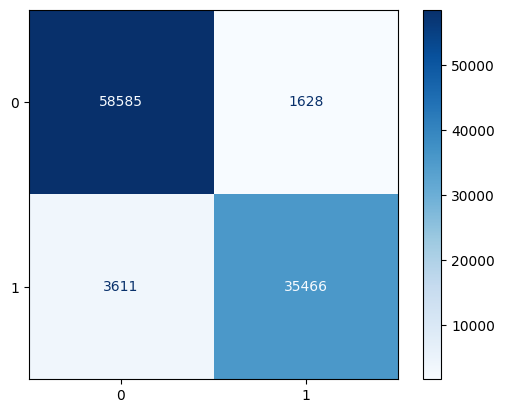

In [37]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        tree,
        features_testing,
        target_testing,
        display_labels=training_data['target'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()